<h1><b>Education & Career Success</b></h1>

<p>Overview: This dataset explores the relationship between academic performance and career success. It includes 5000 records of students' educational backgrounds, skills, and career outcomes. The dataset can be used for various analyses, such as predicting job success based on education, identifying key factors influencing salaries, and understanding the role of networking and internships in career growth.</p>

<a href="https://www.kaggle.com/datasets/adilshamim8/education-and-career-success">Dataset Source</a>

<h2>Data Collection<h2>

In [110]:
import pandas as pd

# load data
df = pd.read_csv('./education_career_success.csv')

# check data
pd.set_option('display.expand_frame_repr', False)
print(df.head())

  Student_ID  Age  Gender  High_School_GPA  SAT_Score  University_Ranking  University_GPA    Field_of_Study  Internships_Completed  Projects_Completed  Certifications  Soft_Skills_Score  Networking_Score  Job_Offers  Starting_Salary  Career_Satisfaction  Years_to_Promotion Current_Job_Level  Work_Life_Balance Entrepreneurship
0     S00001   24    Male             3.58       1052                 291            3.96              Arts                      3                   7               2                  9                 8           5          27200.0                    4                   5             Entry                  7               No
1     S00002   21   Other             2.52       1211                 112            3.63               Law                      4                   7               3                  8                 1           4          25000.0                    1                   1               Mid                  7               No
2     S00003   2

<h2>Defining Objectives</h2>
<ol>
    <li>Look at the relationship between high school performance and college characteristics.</li>
        <ul>
            <li>Does high school performance (GPA, SAT) indicate college rank?</li>
            <li>Does high school performance (GPA, SAT) indicate college GPA?</li>
            <li>Does high school performance (GPA, SAT) indicate major?</li>
        </ul>
    <li>Look at the relationship between major and college performance.</li>
        <ul>
            <li>Does major indicate GPA?</li>
            <li>Does major indicate number of internships?</li>
        </ul>   
    <li>Look at relationship between college performance and post-grad success.</li>
        <ul>
            <li>Does college performance (GPA, internships) indicate number of job offers?</li>
            <li>Does college performance (GPA, internships) indicate starting salary?</li>
        </ul>
    <li>Look at the relationship between major and post-grad happiness.</li>
        <ul>
            <li>Does major indicate career satisfaction?</li>
            <li>Does major indicate work life balance?</li>
        </ul>
    <li>Look at the relationship between gender and major and starting salary.</li>
        <ul>
            <li>Does gender indicate major?</li>
            <li>Does gender indicate starting salary?</li>
        </ul>
</ol>

<h2>Data Cleaning</h2>

In [109]:
# check data formatting
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Student_ID: ['S00001' 'S00002' 'S00003' ... 'S04998' 'S04999' 'S05000']
Age: [24 21 28 25 22 27 20 23 19 29 18 26]
Gender: ['Male' 'Other' 'Female']
High_School_GPA: [3.58 2.52 3.42 2.43 2.08 2.4  2.36 2.68 2.84 3.02 2.95 2.54 2.06 3.21
 2.79 2.6  3.73 3.49 3.72 2.99 2.26 3.39 2.41 2.88 2.13 3.65 2.25 3.81
 2.93 3.24 3.61 2.86 3.57 2.92 3.88 2.97 3.64 3.11 2.94 3.94 3.51 3.62
 2.07 3.29 3.66 2.1  3.7  3.1  2.39 2.63 2.56 3.06 2.32 3.63 2.27 2.47
 2.91 3.03 3.53 2.89 2.23 2.31 2.87 3.16 2.78 2.34 2.45 3.15 2.85 3.33
 3.71 2.98 3.95 2.67 3.19 2.18 3.92 3.43 3.41 3.18 2.9  3.91 3.   3.86
 3.17 3.08 2.42 2.01 2.48 2.76 3.96 2.7  3.55 3.14 3.52 2.3  2.51 2.46
 2.02 2.62 3.97 2.49 2.04 3.28 2.83 3.31 3.38 3.13 3.35 3.89 2.28 2.66
 3.8  3.99 3.04 2.59 2.03 2.44 3.75 2.17 3.3  2.5  3.44 2.37 3.47 2.
 3.83 2.58 2.64 3.85 3.69 3.07 2.05 3.56 3.36 3.27 3.82 2.65 3.78 3.76
 3.32 2.8  2.75 2.19 2.81 3.54 3.79 3.84 2.55 2.57 2.14 2.35 2.69 2.12
 3.77 3.34 3.48 3.09 2.82 3.37 2.21 3.9  2.2  3.01 3.6 

<p>Columns have consistent formatting.</p>

In [24]:
# check data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

<p>Columns have appropriate data types.</p>

In [25]:
# check for duplicate entries
print(f"There are {df['Student_ID'].duplicated().sum()} duplicate Student IDs.")
print(f"There are {df.duplicated().sum()} duplicate entries.")

There are 0 duplicate Student IDs.
There are 0 duplicate entries.


<p>The data does NOT contain duplicates.</p>

In [29]:
# check for missing data
print(df.isna().any())

Student_ID               False
Age                      False
Gender                   False
High_School_GPA          False
SAT_Score                False
University_Ranking       False
University_GPA           False
Field_of_Study           False
Internships_Completed    False
Projects_Completed       False
Certifications           False
Soft_Skills_Score        False
Networking_Score         False
Job_Offers               False
Starting_Salary          False
Career_Satisfaction      False
Years_to_Promotion       False
Current_Job_Level        False
Work_Life_Balance        False
Entrepreneurship         False
dtype: bool


<p>The data does NOT contain missing values.</p>

In [34]:
# check for incorrect data
print(df.describe())

               Age  High_School_GPA    SAT_Score  University_Ranking  University_GPA  Internships_Completed  Projects_Completed  Certifications  Soft_Skills_Score  Networking_Score   Job_Offers  Starting_Salary  Career_Satisfaction  Years_to_Promotion  Work_Life_Balance
count  5000.000000      5000.000000  5000.000000         5000.000000     5000.000000            5000.000000         5000.000000     5000.000000        5000.000000       5000.000000  5000.000000      5000.000000          5000.000000         5000.000000        5000.000000
mean     23.442200         2.996978  1253.832000          504.335600        3.020028               1.982200            4.562800        2.512200           5.546000          5.538000     2.488800     50563.540000             5.578000            3.015800           5.482400
std       3.473712         0.575673   203.228954          291.060011        0.576047               1.408219            2.872927        1.703183           2.851159          2.850084     1.

<p>Column ranges contain possible values.</p>

In [46]:
# check for outliers (using iqr)

# extract only numeric data
numeric_df = df.select_dtypes(include='number')

# calculate the iqr for each column
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)
iqr = q3 - q1

# compute outliers (values far from the middle 50% of the data)
outliers = (numeric_df < (q1 - 1.5 * iqr)) | (numeric_df > (q3 + 1.5 * iqr))
print(outliers.any())

Age                      False
High_School_GPA          False
SAT_Score                False
University_Ranking       False
University_GPA           False
Internships_Completed    False
Projects_Completed       False
Certifications           False
Soft_Skills_Score        False
Networking_Score         False
Job_Offers               False
Starting_Salary           True
Career_Satisfaction      False
Years_to_Promotion       False
Work_Life_Balance        False
dtype: bool


<p>The Starting_Salary column is the only column that contains outliers.</p>

Starting_Salary: 12


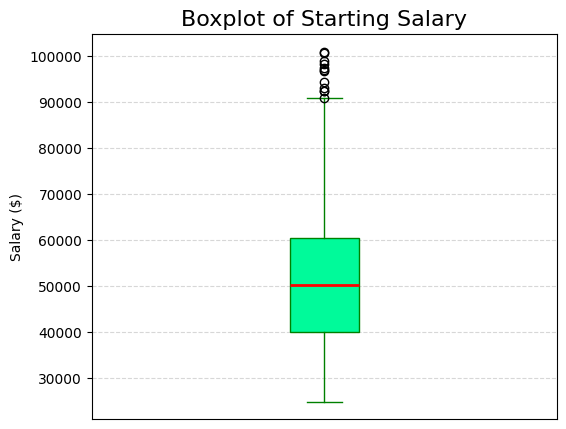

     Student_ID  Age  Gender  High_School_GPA  SAT_Score  University_Ranking  University_GPA Field_of_Study  Internships_Completed  Projects_Completed  Certifications  Soft_Skills_Score  Networking_Score  Job_Offers  Starting_Salary  Career_Satisfaction  Years_to_Promotion Current_Job_Level  Work_Life_Balance Entrepreneurship
16       S00017   20  Female             3.73       1539                 116            3.78            Law                      3                   2               3                  2                 5           3          97500.0                    8                   5               Mid                  9               No
128      S00129   24  Female             2.62       1039                 274            3.60           Arts                      0                   9               0                  1                 6           4          96700.0                    1                   1             Entry                  5              Yes
1284     S01285 

In [128]:
import matplotlib.pyplot as plt

# investigate Starting_Salary outliers

# check how many outliers
print(f'Starting_Salary: {outliers["Starting_Salary"].sum()}')

# visualize outliers
plt.figure(figsize=(6, 5))
plt.boxplot(df['Starting_Salary'],
            patch_artist=True,
            boxprops={'facecolor': 'mediumspringgreen', 'color': 'green'},
            whiskerprops={'color': 'green'},
            capprops={'color': 'green'},
            medianprops={'color': 'red', 'linewidth': 2})
plt.title('Boxplot of Starting Salary', fontsize=16)
plt.ylabel('Salary ($)')
plt.xticks([])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# inspect outliers
salary_outlier_index = outliers[outliers['Starting_Salary']].index
print(df.iloc[salary_outlier_index])


<p>The Starting_Salary column contains 12 outliers.</p>
<p>These outliers are high outliers, meaning the starting salaries are especially large.</p>
<p>The outliers will be kept, because they seem to be legitimate high starting salaries, not errors.</p>